# Scalability Model (Storage Targets)

__28/06/2021__

## Storage Targets Test #06

- 8 computing nodes
- 8 clients (processes) per node.
- 6 storage targets.

In [1]:
# import sys  
# sys.path.insert(0, '/home/luan/Devel/luan-teylo/code/')

# from commons import csv, charts
# import pandas as pd

# dfa = csv.load_ior('csv/old/output.csv')
# dft = cmm.load_tracker_csv('csv/old/tracker.csv')

# # Create a new dataframe with the targets and the bandwidth
# columns  = ['target1', 'target2', 'target3', 'target4', 'target5', 'target6']

# df = pd.DataFrame()
# df['bw'] = dfa['bw']
# df['targets'] = dft['targets']
# df['start'] = dfa['start']

# df[columns] = dft[columns]

# charts.bw_single_histogram(df, bins=20)
# print(f"Mean Bandwidth: {df['bw'].mean(): .2f} +/- {df['bw'].std(): .2f}")

# # Group storage targets to see how the allocation affects the BW
# grouped = df.groupby(columns).agg({'bw': ['count', 'mean', 'min', 'max']})

# # grouped_multiple.columns = ['bw_mean', 'bw_min', 'bw_max']
# grouped = grouped.reset_index()
# grouped

In [2]:
# group2 = df.loc[df['bw'] < 800].groupby(columns).agg({'bw': ['count', 'mean', 'min', 'max']})
# group2 = group2.reset_index()
# group2

In [3]:
# df.loc[df['bw'] < 800]

# re-execution

__15/07/2021__

In [4]:
import sys  
sys.path.insert(0, '/home/luan/Devel/luan-teylo/code/')

from commons import csv, charts
import pandas as pd
dfa = csv.load_ior('csv/output2.csv')
dft = cmm.load_tracker_csv('csv/tracker.csv')
n_targets=6

In [5]:
t0 = dft['ctime'][0]
dft['ctime'] = dft['ctime'].apply(lambda x: (x - t0))

In [6]:
# Create a new dataframe with the targets and the bandwidth
columns  = ['target1', 'target2', 'target3', 'target4', 'target5', 'target6', 'ctime']

df = pd.DataFrame()
df['bw'] = dfa['bw']
df['start'] = dfa['start']
df['end'] = dfa['end']
df['targets'] = dft['targets']
df[columns] = dft[columns]

In [7]:
dk = df[:]

x = dk['ctime'].values.reshape((-1, 1))
y = dk['bw'].values.reshape((-1, 1))

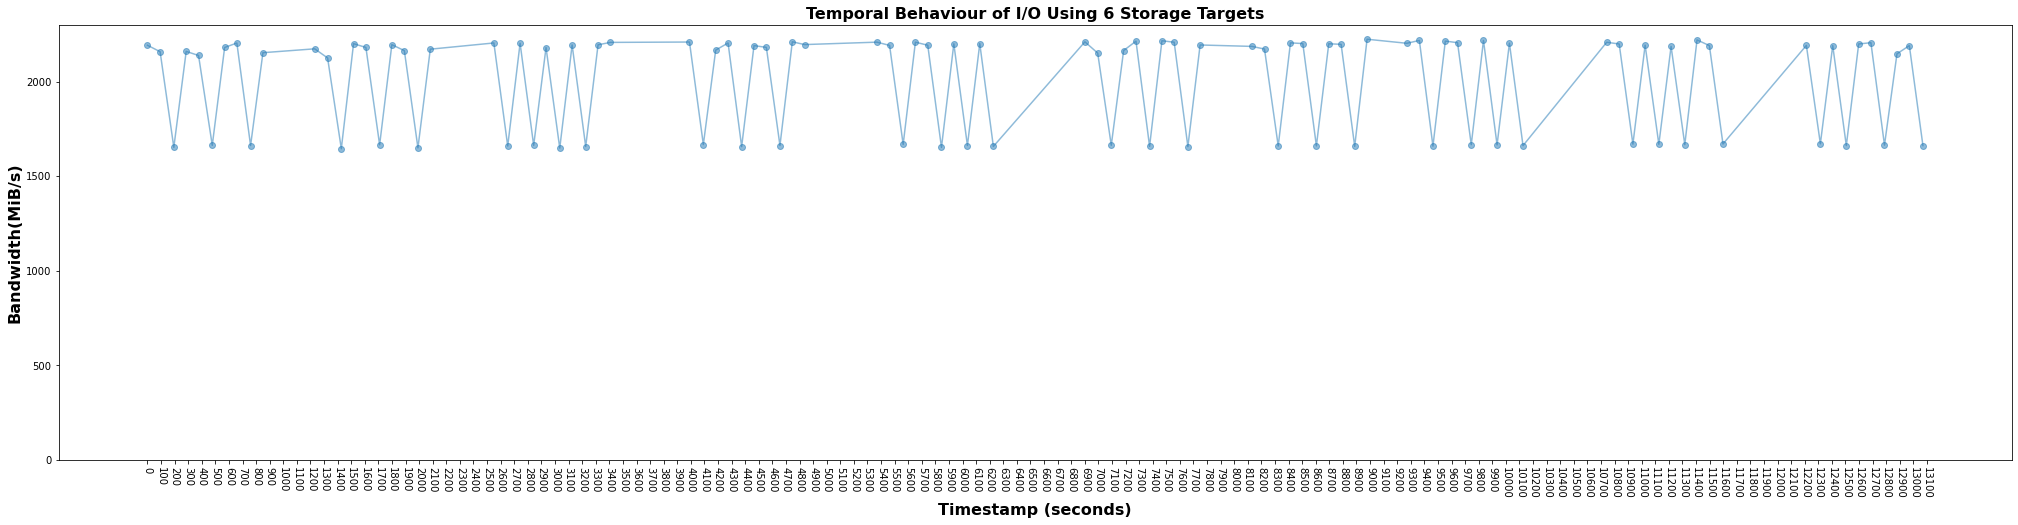

In [8]:
# %matplotlib notebook
from commons import csv, charts
from numpy import array, linspace
import numpy as np
import matplotlib.pyplot as plt
import math


fig, ax = plt.subplots()

fig.set_size_inches(35.0, 8, forward=True)

plt.plot(x, y, 'o-', alpha=0.5)

plt.xticks(range(0, 13200, 100))
plt.xticks(rotation=-90)

plt.ylabel('Bandwidth(MiB/s)',fontweight ='bold', fontsize=16)
plt.xlabel('Timestamp (seconds)', fontweight ='bold', fontsize=16)
plt.title(f"Temporal Behaviour of I/O Using {n_targets} Storage Targets", fontweight ='bold', fontsize=16)

# plt.rcParams["figure.figsize"] = [35.0, 8.0]
# plt.rcParams["figure.autolayout"] = True

plt.ylim([0, 2300])


# plt.grid()
# fig.savefig(f'../graph/{n_targets}st.pdf', format='pdf', dpi=1200)  

plt.show()

In [9]:
g_columns = ['target1', 'target2', 'target3', 'target4', 'target5', 'target6']
gb = df.groupby(g_columns).agg({'bw': ['count','mean', 'min', 'max']})
gb.columns = ['bw_count','bw_mean', 'bw_min', 'bw_max']
gb = gb.reset_index()
gb

target1 target2 target3 target4 target5 target6  bw_count      bw_mean  \
0     101     102     103     104     201     204        28  1662.620714   
1     101     102     103     202     203     204        25  2191.563600   
2     101     104     201     202     203     204         7  1657.625714   
3     102     103     104     201     202     203        40  2193.298500   

    bw_min   bw_max  
0  1650.30  1671.96  
1  2147.93  2225.03  
2  1646.01  1669.32  
3  2126.05  2218.53

In [10]:
# fig, ax =plt.subplots()
# fig.set_size_inches(35.0, 8, forward=True)
# ax.axis('tight')
# ax.axis('off')

# the_table = ax.table(cellText=gb.values,colLabels=gb.columns,loc='center')
# plt.title('Groups using 6 Storage Targets', size=16, fontweight ='bold')


# from matplotlib.backends.backend_pdf import PdfPages
# pp = PdfPages("../graph/table_6.pdf")
# pp.savefig(fig, bbox_inches='tight')
# pp.close()

In [11]:
df1 = df.loc[(df['target1'] == '101') & (df['target2'] == '102') & (df['target3'] == '103') &
             (df['target4'] == '104') & (df['target5'] == '201') & (df['target6'] == '204')]

df2 = df.loc[(df['target1'] == '101') & (df['target2'] == '102') & (df['target3'] == '103') &
             (df['target4'] == '202') & (df['target5'] == '203') & (df['target6'] == '204')]

df3 = df.loc[(df['target1'] == '101') & (df['target2'] == '104') & (df['target3'] == '201') &
             (df['target4'] == '202') & (df['target5'] == '203') & (df['target6'] == '204')]


df4 = df.loc[(df['target1'] == '102') & (df['target2'] == '103') & (df['target3'] == '104') &
             (df['target4'] == '201') & (df['target5'] == '202') & (df['target6'] == '203')]

__22/07/2021__

# Generating the boxplot graph

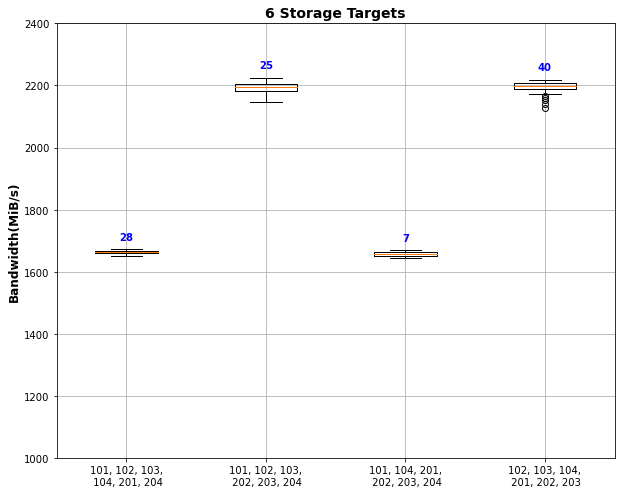

In [12]:
n_targets = 6


xlabels = ['101, 102, 103,\n 104, 201, 204',
           '101, 102, 103,\n 202, 203, 204',
           '101, 104, 201,\n 202, 203, 204',
           '102, 103, 104,\n 201, 202, 203']

dframes = [df1, df2, df3, df4]

cmm.boxplot(xlabels=xlabels, values=[d['bw'].values for d in dframes], 
            title=f"{n_targets} Storage Targets",
            ylabel='Bandwidth(MiB/s)',
            xlabel='',
            save_to=f'../graphs/boxplot/{n_targets}_boxplot.pdf',
            ylim=[1000,2400],
            rotation_x=0.0,
            dframes=dframes,
           plot_obs=True)

In [13]:
# fig, ax = plt.subplots()

# fig.set_size_inches(35.0, 8, forward=True)

# plt.plot(x, y, '-', alpha=0.3)

# plt.xticks(range(0, 13200, 100))
# plt.xticks(rotation=-90)

# plt.ylabel('Bandwidth(MiB/s)',fontweight ='bold', fontsize=16)
# plt.xlabel('Timestamp (seconds)', fontweight ='bold', fontsize=16)
# plt.title("Temporal Behaviour of I/O Using 6 Storage Targets", fontweight ='bold', fontsize=24)

# plt.ylim([0, 2300])


# plt.scatter(df1['ctime'].values.reshape((-1, 1)), df1['bw'].values.reshape((-1, 1)), 
#             color='red', label='101, 102, 103, 104, 201 and 204')
# plt.scatter(df2['ctime'].values.reshape((-1, 1)), df2['bw'].values.reshape((-1, 1)), 
#             color='purple', label='101, 102, 103, 202, 203 and 204')
# plt.scatter(df3['ctime'].values.reshape((-1, 1)), df3['bw'].values.reshape((-1, 1)), 
#             color='green', label='101, 104, 201, 202, 203 and 204')
# plt.scatter(df4['ctime'].values.reshape((-1, 1)), df4['bw'].values.reshape((-1, 1)), 
#             color='black', label='102, 103, 104, 201, 202 and 203')


# plt.legend(fontsize=16)
# # plt.grid()
# fig.savefig('../graph/6st.pdf', format='pdf', dpi=1200)  

# plt.show()